### Network Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
% matplotlib inline
import random as rn

In [2]:
import networkx as nx

----------

In [3]:
from src import DataReader as DTR

-------

In [4]:
class Network(object):
    
    def __init__(self,mdata,ndata):
        self.nodes = ndata['nodes']
        self.links = ndata['links']
        self.type = mdata['type']
        self.color_dict = mdata['color_dict']
        self.count = []
        self.G = nx.DiGraph()
        
   
    '''=========Get basic netywork========='''
    def get_network(self):
        for item in self.nodes:
            self.G.add_node(item['id'],typ = item['type'],\
                           name = item['name'],icolor = item['icolor'])
        for item in self.links:
            self.G.add_edge(item['source'],item['target'],\
                            weight = item['value']) 
    
         
    '''get types count of nodes for legend'''
    def get_type_count(self):
        for typ in self.type:
            typ_cnt = 0
            for nds in self.nodes:
                if nds["type"]==typ:
                    typ_cnt = typ_cnt+1
            if typ_cnt !=0:        
                self.count.append({"type":typ,\
                          "icolor":self.color_dict[typ],\
                          "icount":typ_cnt})
        return self.count
    
    def get_degree(self):
        self.get_network()
        new_nodes = []
        for node in self.nodes:
            if node['id'] =='C':
                node.update({'degree':25})
            else:
                node.update({'degree':self.G.degree(node['id'])+1})
            new_nodes.append(node)
        self.nodes = new_nodes
        
        
    '''=============== GET DATA ================='''
    
    '''basic data dumper'''            
    def data_dumper(self,file_name,data):
            with open(file_name, 'w') as fp:
                json.dump(data, fp)
                   
                    
    def get_network_data(self,fname,dump = False):
        self.get_type_count()
        self.get_degree()
        new_data = {'links': self.links, 'nodes': self.nodes, 'count': self.count}
        
        if dump:
            self.data_dumper(file_name = fname,data = new_data) 
        
        return new_data
    

----------

### Test Run

In [5]:
with open('./src/mdata.json', 'r') as f:
     mdata = json.load(f)

In [6]:
PMID = "18561524"
DR = DTR.DataReader("./data/" + PMID + ".ann",mdata)
#jsondata = DR.get_data("./network/" + "sample" + ".json", dump=Frue)
ndata = DR.get_data(None, dump=False)

In [7]:
N = Network(mdata,ndata)

In [8]:
new_data = N.get_network_data("./network/newdata.json",dump=True)

In [9]:
new_data

{'count': [{'icolor': 'Green', 'icount': 6, 'type': 'Coreference'},
  {'icolor': 'Gold', 'icount': 3, 'type': 'Severity'},
  {'icolor': 'MediumVioletRed', 'icount': 1, 'type': 'Gender'},
  {'icolor': 'DarkGreen', 'icount': 9, 'type': 'Biological_structure'},
  {'icolor': 'MediumVioletRed', 'icount': 1, 'type': 'Age'},
  {'icolor': 'GreenYellow', 'icount': 18, 'type': 'Sign_symptom'},
  {'icolor': 'Green', 'icount': 7, 'type': 'Date'},
  {'icolor': 'MediumVioletRed', 'icount': 1, 'type': 'History'},
  {'icolor': 'Yellow', 'icount': 17, 'type': 'Lab_value'},
  {'icolor': 'LightGreen', 'icount': 5, 'type': 'Nonbiological_location'},
  {'icolor': 'Gold', 'icount': 2, 'type': 'Administration'},
  {'icolor': 'Green', 'icount': 1, 'type': 'Distance'},
  {'icolor': 'DarkRed', 'icount': 9, 'type': 'Activity'},
  {'icolor': 'Gold', 'icount': 2, 'type': 'Dosage'},
  {'icolor': 'DarkGreen', 'icount': 5, 'type': 'Detailed_description'},
  {'icolor': 'Gold', 'icount': 20, 'type': 'Qualitative_concep

-------

### Rough

In [24]:
#for n1,n2,attr in G.edges(data=True): 
     #print(n1,n2,attr['weight'])

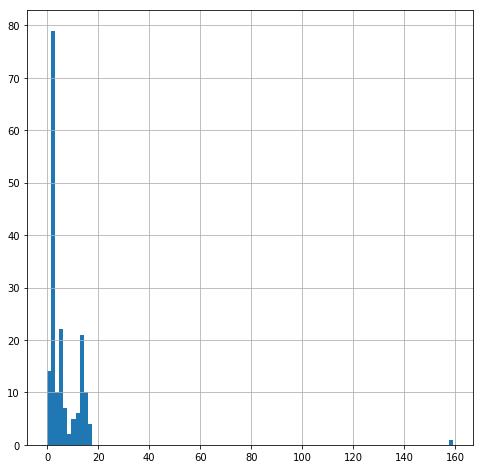

In [48]:
plt.figure(figsize =[8,8])
degreeL = []
for node in G.nodes():
        degreeL.append({'node':node,'degree':G.degree(node)})
        #print(node, G.degree(node))
degreedf = pd.DataFrame(degreeL)
degreedf['degree'].hist(bins =100)

--------

### Analysis

In [50]:
N,K = G.order(),G.size()
avg_deg = float(K)/N
N,K,avg_deg

(181, 595, 3.287292817679558)

In [51]:
G.in_degree()

InDegreeView({'T1': 0, 'T2': 0, 'T8': 1, 'T9': 1, 'T13': 1, 'T17': 1, 'T21': 0, 'T22': 1, 'T29': 1, 'T32': 1, 'T36': 1, 'T37': 1, 'T38': 1, 'T40': 1, 'T41': 1, 'T46': 1, 'T47': 1, 'T53': 1, 'T55': 0, 'T58': 1, 'T60': 0, 'T62': 1, 'T64': 1, 'T66': 1, 'T70': 0, 'T72': 2, 'T73': 2, 'T74': 1, 'T77': 1, 'T79': 1, 'T81': 1, 'T83': 1, 'T87': 1, 'T88': 2, 'T89': 1, 'T91': 1, 'T94': 1, 'T96': 1, 'T99': 1, 'T101': 1, 'T104': 1, 'T105': 1, 'T107': 1, 'T114': 1, 'T115': 0, 'T118': 0, 'T125': 1, 'T127': 1, 'T128': 1, 'T134': 1, 'T136': 1, 'T138': 1, 'T141': 1, 'T142': 1, 'T144': 1, 'T145': 1, 'T154': 0, 'T156': 1, 'T163': 1, 'T166': 1, 'T168': 1, 'T169': 1, 'T171': 1, 'T173': 1, 'T177': 1, 'T174': 1, 'T180': 0, 'E1': 2, 'E2': 1, 'E3': 1, 'E4': 6, 'E5': 1, 'E6': 3, 'E7': 4, 'E8': 1, 'E9': 1, 'E10': 4, 'E11': 1, 'E12': 1, 'E13': 1, 'E14': 3, 'E15': 4, 'E16': 4, 'E17': 5, 'E18': 6, 'E19': 7, 'E20': 9, 'E21': 13, 'E22': 2, 'E23': 2, 'E24': 2, 'E25': 2, 'E26': 11, 'E27': 13, 'E28': 12, 'E29': 2, 'E30': 

In [52]:
G.out_degree()

OutDegreeView({'T1': 0, 'T2': 0, 'T8': 1, 'T9': 0, 'T13': 1, 'T17': 1, 'T21': 1, 'T22': 1, 'T29': 1, 'T32': 1, 'T36': 1, 'T37': 1, 'T38': 1, 'T40': 1, 'T41': 1, 'T46': 1, 'T47': 1, 'T53': 1, 'T55': 1, 'T58': 1, 'T60': 1, 'T62': 1, 'T64': 1, 'T66': 1, 'T70': 1, 'T72': 0, 'T73': 1, 'T74': 1, 'T77': 1, 'T79': 1, 'T81': 1, 'T83': 1, 'T87': 1, 'T88': 1, 'T89': 1, 'T91': 1, 'T94': 1, 'T96': 1, 'T99': 1, 'T101': 1, 'T104': 1, 'T105': 1, 'T107': 1, 'T114': 4, 'T115': 1, 'T118': 2, 'T125': 1, 'T127': 1, 'T128': 1, 'T134': 1, 'T136': 1, 'T138': 1, 'T141': 1, 'T142': 1, 'T144': 1, 'T145': 1, 'T154': 1, 'T156': 1, 'T163': 1, 'T166': 1, 'T168': 1, 'T169': 1, 'T171': 1, 'T173': 1, 'T177': 1, 'T174': 1, 'T180': 1, 'E1': 3, 'E2': 1, 'E3': 2, 'E4': 1, 'E5': 1, 'E6': 1, 'E7': 1, 'E8': 1, 'E9': 1, 'E10': 1, 'E11': 1, 'E12': 1, 'E13': 11, 'E14': 10, 'E15': 9, 'E16': 8, 'E17': 7, 'E18': 6, 'E19': 5, 'E20': 4, 'E21': 3, 'E22': 1, 'E23': 1, 'E24': 1, 'E25': 1, 'E26': 2, 'E27': 1, 'E28': 2, 'E29': 2, 'E30': 1

In [53]:
in_degrees = G.in_degree() # dictionary node:degree
in_values = sorted(set(dict(in_degrees).values()))
out_degrees = G.out_degree() # dictionary node:degree
out_values = sorted(set(dict(out_degrees).values()))

In [54]:
in_hist = [list(dict(in_degrees).values()).count(x) for x in in_values]
out_hist = [list(dict(out_degrees).values()).count(x) for x in out_values]

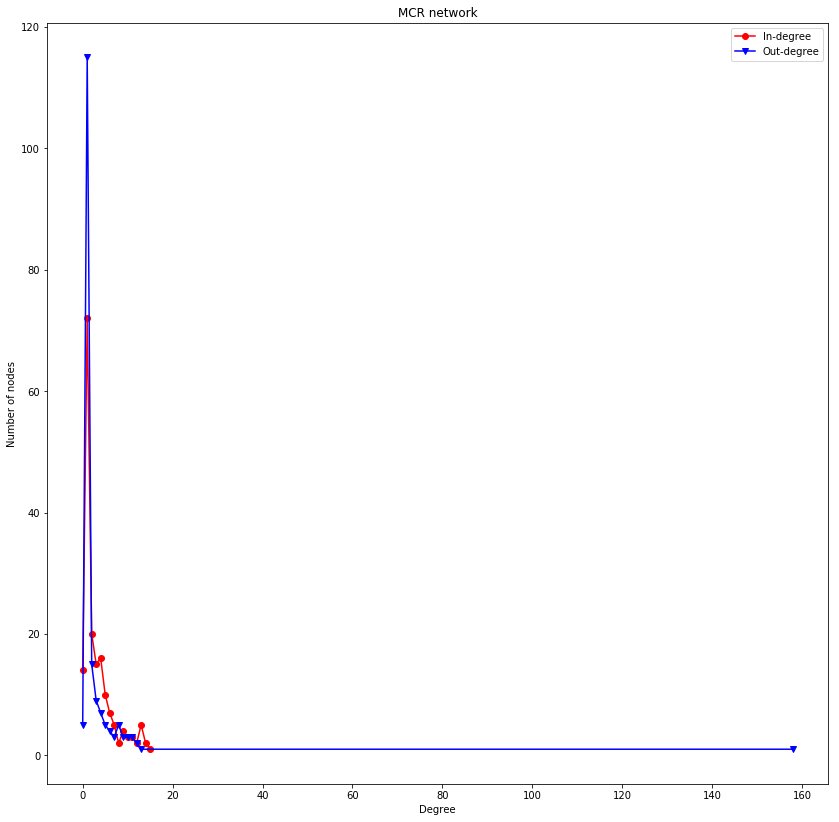

In [55]:
plt.figure(figsize = [14,14])
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('MCR network')
plt.show()

In [56]:
gud = G.to_undirected()

In [57]:
ccs = nx.clustering(gud)

In [58]:
avg_clust = sum(ccs.values()) / len(ccs)

In [59]:
g_components = list(nx.connected_component_subgraphs(gud))

In [60]:
g_mc=g_components[0]
bet_cen = nx.betweenness_centrality(g_mc)
clo_cen = nx.closeness_centrality(g_mc)
eig_cen = nx.eigenvector_centrality(g_mc)

In [61]:
def highest_centrality(cent_dict):
    #Returns a tuple (node,value) with the node
    #with largest value from Networkx centrality dictionary

    # Create ordered tuple of centrality data
    cent_items=[(b,a) for (a,b) in cent_dict.iteritems()]
    # Sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

In [62]:
from scipy import polyfit

In [63]:
def centrality_scatter(dict1,dict2,path="",
                    ylab="",xlab="",title="",line=False):
    
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]

    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
    if line:
            # use NumPy to calculate the best fit
            slope, yint = polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')


    # Set new x- and y-axis limits
    
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)

/home/ping-dev04/anaconda2/envs/GenomX/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/home/ping-dev04/anaconda2/envs/GenomX/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


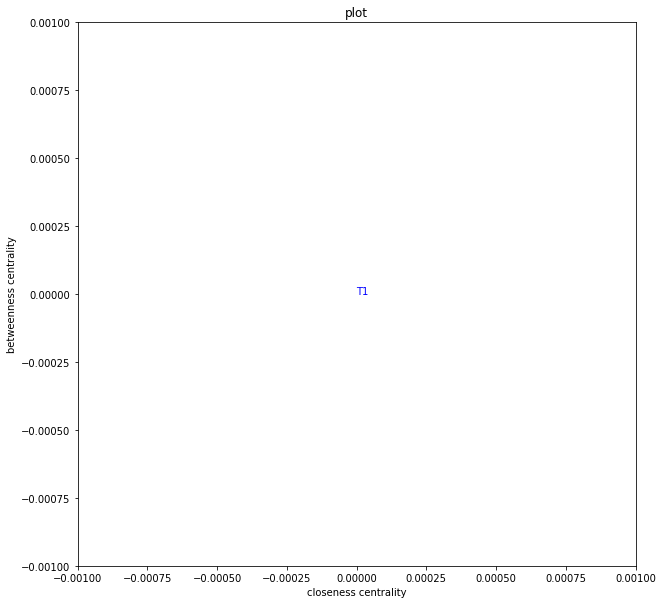

In [70]:
centrality_scatter(dict1=bet_cen,\
                   dict2=clo_cen,\
                   path="./",
                   ylab="betweenness centrality",\
                   xlab="closeness centrality",\
                   title="plot",\
                   line=False)

-------

#### References

1. https://www.cl.cam.ac.uk/~cm542/teaching/2011/stna-pdfs/stna-lecture11.pdf